In [1]:
# load ML libraries
import numpy as np #usage of arrays
import pandas as pd #usage of dataframes and data manipulation
import matplotlib.pyplot as plt #data visualisation and charts
import seaborn as sns #statistical graphs

# scikit-learn for ML
import sklearn


/var/folders/73/p3zd838160j7r5kxxlkzlyl80000gn/T/ipykernel_23333/2918862704.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd #usage of dataframes and data manipulation


In [ ]:
!python3.11 -m pip 

## Load the data and do basic data exploration

In [2]:
# load dataset "house_dataset.csv" with pandas
df = pd.read_csv('house_dataset.csv')

# let's drop rows with missing values
df = df.dropna()

# drop rows with price=0
df = df[df['price'] != 0]

# drop rows with price > 1.5M
df = df[df['price'] < 1500000]


# let's look at the start of the dataset
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [ ]:
df.columns

# drop: 'date', 'street', 'city', 'statezip', 'country'
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

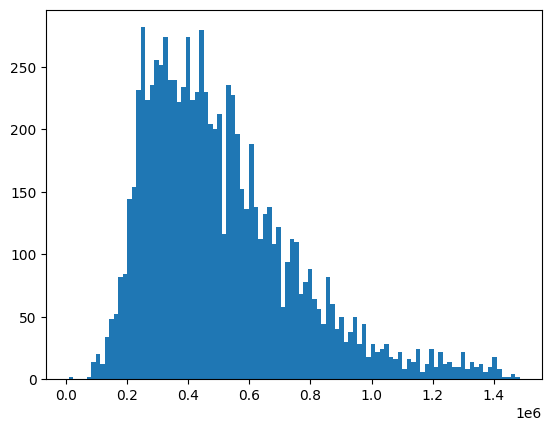

In [ ]:
# let's plot histogram of the price
plt.hist(df['price'], bins=100);


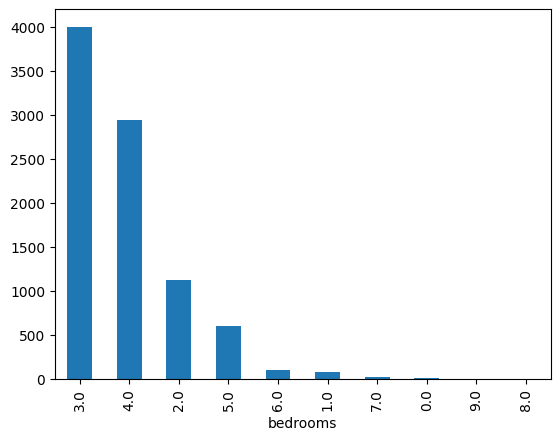

In [ ]:
# let's plot bar chart of the bedrooms
df['bedrooms'].value_counts().plot(kind='bar');

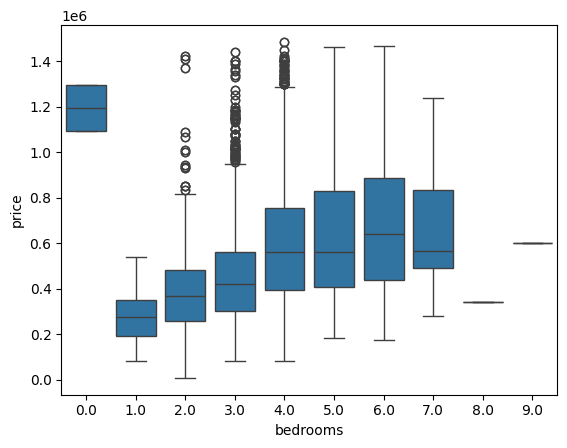

In [ ]:
# box plot of year built vs price
sns.boxplot(x='bedrooms', y='price', data=df);

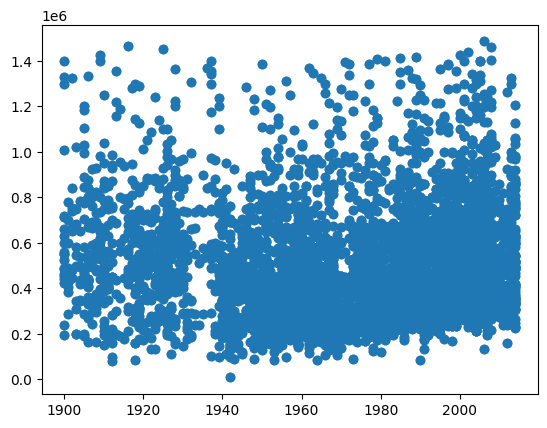

In [ ]:
# scatter plot of price against yr_built
plt.scatter(df['yr_built'], df['price']);

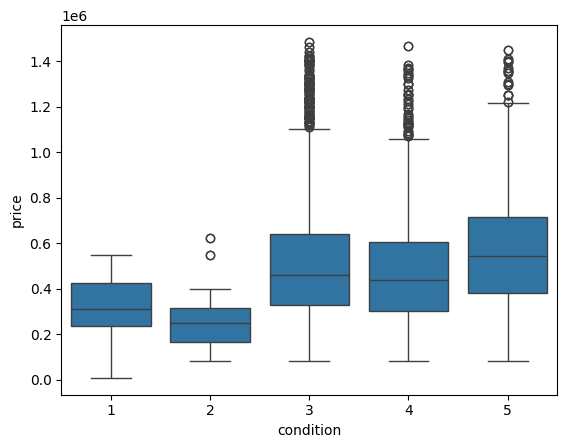

In [ ]:
#box plot of price vs condition
sns.boxplot(x='condition', y='price', data=df);

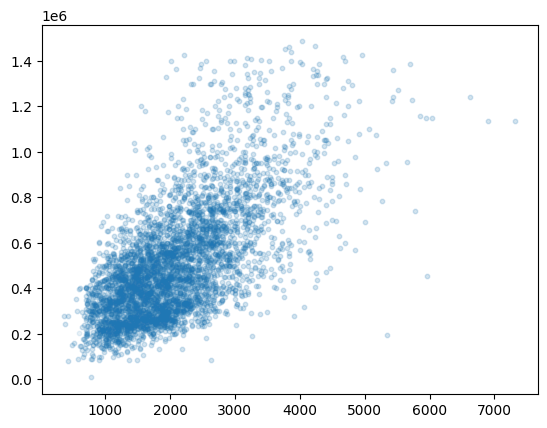

In [ ]:
# scatter plot of price vs sqft_living
plt.scatter(df['sqft_living'], df['price'], alpha=0.1, s=10)

<Axes: xlabel='bedrooms', ylabel='price'>

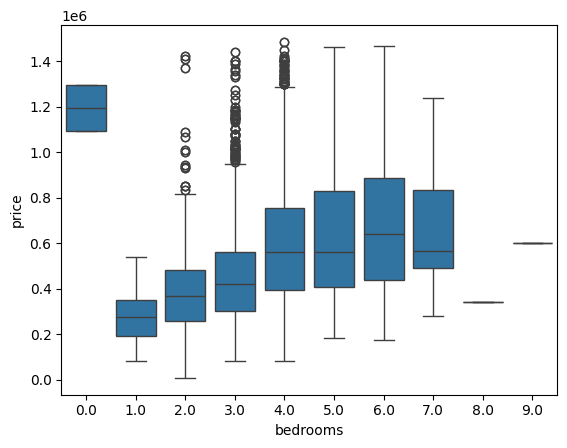

In [ ]:
# boxplot of price vs bedrooms
sns.boxplot(x='bedrooms', y='price', data=df) 

<Axes: xlabel='view', ylabel='price'>

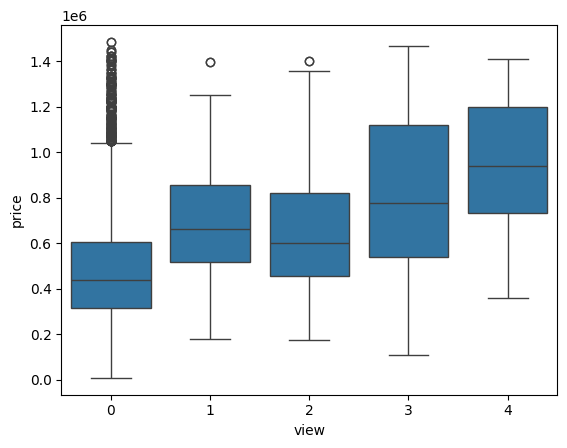

In [ ]:
# boxplot of price vs view
sns.boxplot(x='view', y='price', data=df)

<Axes: >

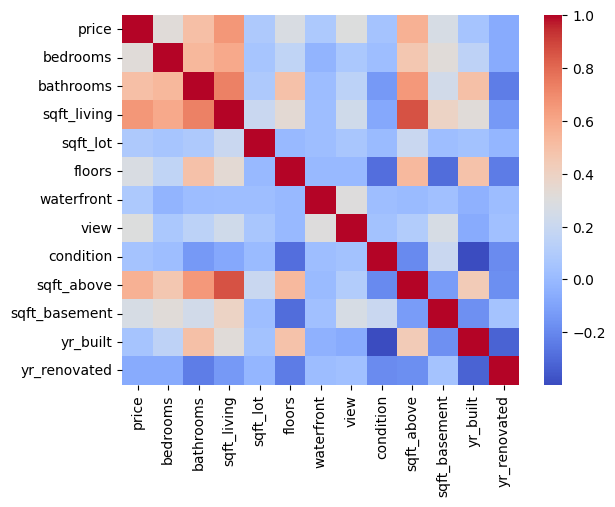

In [ ]:
# plot correlation between features
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [ ]:
# create log_price feature
df['log_price'] = np.log10(df['price'])

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,log_price
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,5.495544
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,5.534026
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,5.623249
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.740363
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,5.690196


In [ ]:
# create a function to compute the relative error
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# this can be understood as the percentage difference between the true and predicted values

In [ ]:
# create a function to compute the RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

## Naive regression

In [ ]:
# lets compute the mean of log_price
avg_log_price = df['log_price'].mean()

# the naive price calculates the mean log price as a prediction of the price. Further models should be better than this.

In [ ]:
# compute the RMSE between log_price and avg_log_price using the function rmse
naive_rmse = rmse(df['price'], 10**avg_log_price)
print(naive_rmse)

256357.10667379157


In [ ]:
# calculate relative error of the naive model
naive_relative_error = relative_error(df['price'], 10**avg_log_price)
print(naive_relative_error)


0.4383211771359206


### Linear regression

In [ ]:
# let's start with a linear regression model using sklearn
from sklearn.linear_model import LinearRegression

# our target variable is log_price
y = df['log_price']

# our features are all the other columns
X = df.drop(['log_price', 'price'], axis=1)

# create a linear regression model
model = LinearRegression()

# fit the model
model.fit(X, y)

# fiting the model is the process of finding the best parameters for the model that minimize the error between the true and predicted values.

LinearRegression()

In [ ]:
# let's look at the coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 8.231660143199067
Coefficients: [-2.62832423e-02  5.22917220e-02 -8.52417181e-05 -2.29713030e-07
  6.58247924e-02  6.65262949e-02  2.35129943e-02  2.61069619e-02
  2.29806149e-04  2.29106409e-04 -1.56827301e-03  4.95383985e-06]


In [ ]:
# let's make predictions
y_LM_pred = model.predict(X)

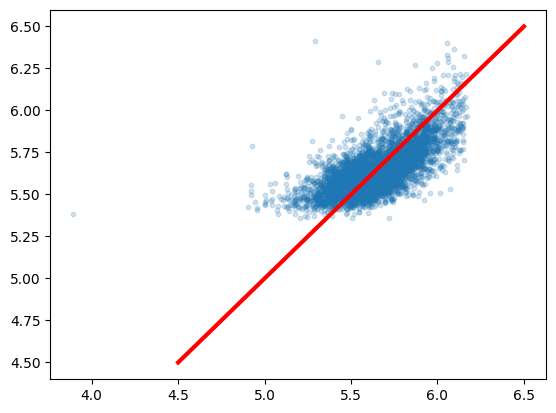

In [ ]:
# let's plot the predictions vs the actual values
plt.scatter(y, y_LM_pred, alpha=0.1, s=10)

# let's draw the perfect prediction line
plt.plot([4.5, 6.5], [4.5, 6.5], color='red', lw=3)

In [ ]:
# let's compute the RMSE and relative error and compare it to the naive model. convert the log predictions to price. print the answers
y_LM_pred_price = 10**y_LM_pred 

LM_rmse = rmse(df['price'], y_LM_pred_price)
print(LM_rmse)

LM_relative_error = relative_error(df['price'], y_LM_pred_price)
print(LM_relative_error)

190148.515767878
0.3063710017319361


### Polynomial Regression / Feature Engineering

In [ ]:
# let's add polynomial features
from sklearn.preprocessing import PolynomialFeatures

# create a polynomial transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# transform our features
X_poly = poly.fit_transform(X)

# print number of features
print("Number of features:", X_poly.shape[1])


Number of features: 90


In [ ]:
# let's create a new linear regression model
model_poly = LinearRegression()

# fit the model
model_poly.fit(X_poly, y)

# let's make predictions
y_poly_pred = model_poly.predict(X_poly)

# compare RMSEs and relative errors
y_poly_pred_price = 10**y_poly_pred

poly_rmse = rmse(df['price'], y_poly_pred_price)
print(poly_rmse)

poly_relative_error = relative_error(df['price'], y_poly_pred_price)
print(poly_relative_error)

171110.1515128986
0.28810896634399497


### K nearest neighbours models

In [ ]:
# find the knn model with k = 5
from sklearn.neighbors import KNeighborsRegressor

# create a knn model
knn = KNeighborsRegressor(n_neighbors=5)

# fit the model
knn.fit(X, y)

# make predictions
y_knn_pred = knn.predict(X)

# compare RMSEs and relative errors
y_knn_pred_price = 10**y_knn_pred

knn_rmse = rmse(df['price'], y_knn_pred_price)
print(knn_rmse)

knn_relative_error = relative_error(df['price'], y_knn_pred_price)
print(knn_relative_error)


135387.73391671554
0.20507345739165023


### SVR Regression

In [ ]:
# create a SVR model
from sklearn.svm import SVR

# create a SVR model
svr = SVR()

# fit the model
svr.fit(X, y)

# make predictions
y_svr_pred = svr.predict(X)

# compare RMSEs and relative errors
y_svr_pred_price = 10**y_svr_pred
svr_rmse = rmse(df['price'], y_svr_pred_price)
print(svr_rmse)

svr_relative_error = relative_error(df['price'], y_svr_pred_price)
print(svr_relative_error)

192682.1711386109
0.31388840204957996


In [ ]:
# built me a table summarizing all the RMSEs and relative errors
results = pd.DataFrame({
    'Model': ['Naive', 'Linear Regression', 'Polynomial Regression', 'KNN', 'SVR'],
    'RMSE': [naive_rmse, LM_rmse, poly_rmse, knn_rmse, svr_rmse],
    'Relative Error': [naive_relative_error, LM_relative_error, poly_relative_error, knn_relative_error, svr_relative_error]
})

results

,Model,RMSE,Relative Error
0,Naive,256357.106674,0.438321
1,Linear Regression,190148.515768,0.306371
2,Polynomial Regression,171110.151513,0.288109
3,KNN,135387.733917,0.205073
4,SVR,192682.171139,0.313888


### Summary

Text(0.5, 1.0, 'Relative Error')

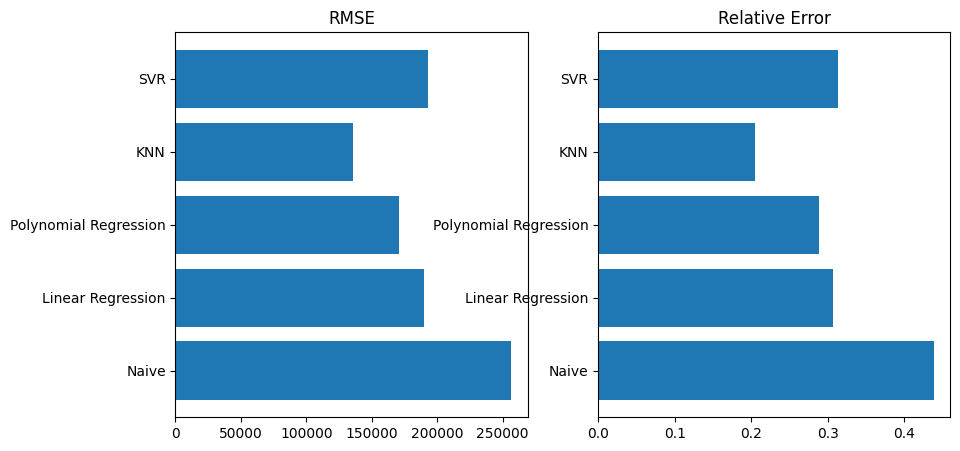

In [ ]:
# plot the RMSEs and relative errors
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.barh(results['Model'], results['RMSE'])
plt.title('RMSE')
plt.subplot(1, 2, 2)
plt.barh(results['Model'], results['Relative Error'])
plt.title('Relative Error')

In [3]:
!pip3 install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 7.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 12.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 5.2 MB/s eta 0:00:0000:01
  Created wheel for libclang: filename=libclang-18.1.1-py2.py3-none-any.whl size=39061 sha256=a37b

In [4]:


# import and install keras
import keras


2024-03-18 00:36:08.467314: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Conclusion is that KNN is the best performing model. 

In [30]:
# load mnist dataset with keras
def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    return x_train, y_train, x_test, y_test

#load it

x_train, y_train, x_test, y_test = load_data()


NameError: name 'keras' is not defined